# 데이터 준비

In [1]:
import numpy as np
import os

data_path = os.getenv("HOME")+'/mini_projects/_E-05_speech/speech_wav_8000.npz'
speech_data = np.load(data_path)

print("Wave data shape : ", speech_data["wav_vals"].shape)
print("Label data shape : ", speech_data["label_vals"].shape)

print(type(speech_data["wav_vals"]))

Wave data shape :  (50620, 8000)
Label data shape :  (50620, 1)
<class 'numpy.ndarray'>


# 데이터 변형

In [2]:
import librosa

def wav2spec(wav, fft_size=258): # spectrogram shape을 맞추기위해서 size 변형
    D = np.abs(librosa.stft(wav, n_fft=fft_size))
    return D

spec = []
for i in speech_data["wav_vals"]:
    data = wav2spec(i)
    spec.append(data)

spec_data = np.array(spec)

print("Waveform shape : ",speech_data["wav_vals"].shape)
print("Spectrogram shape : ",spec_data.shape)



Waveform shape :  (50620, 8000)
Spectrogram shape :  (50620, 130, 126)


# 데이터 확인

In [3]:
print(len(spec_data[0]))
print(len(spec_data[0][0]))

import pandas as pd

s = pd.DataFrame(speech_data["wav_vals"])
s

130
126


,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
0,-0.000127,-0.000113,-0.000187,-0.000355,0.000106,-0.000282,0.000068,-0.000227,-0.000424,0.000063,...,0.000183,-0.000043,0.000181,0.000011,-0.000343,-0.000350,-0.000074,-0.000016,-0.000493,-0.000355
1,-0.003070,-0.004108,-0.003310,-0.004427,-0.003219,-0.004129,-0.004625,-0.004393,-0.004105,-0.004407,...,-0.004664,-0.004707,-0.003774,-0.005877,-0.006239,-0.005977,-0.004616,-0.004678,-0.004215,-0.006101
2,0.000159,0.001114,-0.001259,-0.000738,0.003397,0.001521,-0.002699,-0.002433,-0.000022,-0.002244,...,0.014679,0.017458,-0.001245,-0.024796,-0.040312,-0.026082,-0.014229,-0.009507,0.014781,0.034189
3,0.001268,0.001388,0.000152,0.000120,-0.000680,0.000199,-0.000232,-0.000001,0.001591,0.000617,...,-0.001752,-0.001838,-0.001485,-0.001309,0.003230,0.008921,0.008553,0.001485,-0.002961,-0.005057
4,0.000574,0.000840,0.000895,0.000647,0.000280,-0.000217,0.000461,0.000633,0.000636,0.001064,...,0.001174,0.001058,0.000712,0.000387,0.000962,0.000956,0.000631,0.000834,0.000661,0.000674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50615,0.334931,-0.117322,-0.014725,0.024858,-0.229744,0.082945,0.217508,0.185062,0.027536,0.286398,...,-0.067289,0.079807,0.292446,0.049526,0.632250,0.241216,-0.207395,0.048736,0.198288,0.104901
50616,0.184544,-0.125377,0.176016,-0.274171,-0.080463,-0.145032,0.109245,0.263641,-0.096188,-0.060992,...,-0.136064,-0.187057,0.017153,-0.081678,0.123741,-0.134321,0.046961,0.069949,-0.098987,0.046504
50617,-0.071388,0.111577,-0.349125,-0.501486,-0.093450,0.099969,0.083615,0.275408,-0.102866,-0.093024,...,0.149055,0.086741,0.108124,-0.129099,-0.004562,0.485416,0.010466,0.127256,-0.206745,0.021367
50618,0.280666,0.176844,-0.082263,0.141288,0.401925,-0.170835,-0.251514,0.239983,0.441771,-0.060881,...,-0.139662,0.253226,0.175396,0.236805,-0.047422,0.359583,0.118793,0.043083,0.085176,-0.132893


## label data 처리

In [4]:
target_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

label_value = target_list
label_value.append('unknown')
label_value.append('silence')

print('LABEL : ', label_value)

new_label_value = dict()
for i, l in enumerate(label_value):
    new_label_value[l] = i
label_value = new_label_value

print('Indexed LABEL : ', label_value)

LABEL :  ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'unknown', 'silence']
Indexed LABEL :  {'yes': 0, 'no': 1, 'up': 2, 'down': 3, 'left': 4, 'right': 5, 'on': 6, 'off': 7, 'stop': 8, 'go': 9, 'unknown': 10, 'silence': 11}


In [5]:
temp = []
for v in speech_data["label_vals"]:
    temp.append(label_value[v[0]])
label_data = np.array(temp)

label_data
print(len(label_data))

50620


# 훈련 / 테스트 셋 분리

In [6]:
from sklearn.model_selection import train_test_split

# sr = 16380  #################################################################### 136 * 120
train_wav, test_wav, train_label, test_label = train_test_split(spec_data, 
                                                                label_data, 
                                                                test_size=0.1,
                                                                shuffle=True)

# train_wav = train_wav.reshape([-1, sr, 1]) # add channel for CNN
# test_wav = test_wav.reshape([-1, sr, 1])

train_wav = train_wav.reshape([-1, 130, 126 , 1]) # add channel for CNN
test_wav = test_wav.reshape([-1, 130, 126, 1])


print(train_wav.shape)
print(train_wav)

(45558, 130, 126, 1)
[[[[2.3780025e-03]
   [1.7223418e-03]
   [6.9769914e-04]
   ...
   [2.6462442e-04]
   [4.6283836e-04]
   [8.5395685e-04]]

  [[1.9292784e-03]
   [7.3714281e-04]
   [1.6783897e-03]
   ...
   [3.8036695e-04]
   [4.5541272e-04]
   [9.8669669e-04]]

  [[1.3538057e-03]
   [1.1448943e-03]
   [2.9955388e-03]
   ...
   [4.2854124e-04]
   [8.9756143e-04]
   [1.8060579e-03]]

  ...

  [[4.0143699e-05]
   [2.2513816e-05]
   [1.3179465e-05]
   ...
   [2.8574509e-06]
   [7.4063955e-06]
   [1.4097084e-05]]

  [[4.7304256e-05]
   [2.6502725e-05]
   [4.0967334e-06]
   ...
   [2.9738617e-06]
   [8.2518454e-06]
   [1.5221042e-05]]

  [[4.8599341e-05]
   [2.2543467e-05]
   [1.7705809e-06]
   ...
   [1.0745722e-06]
   [8.1437001e-06]
   [1.5930926e-05]]]


 [[[1.8548517e-01]
   [1.2508872e-01]
   [3.0829890e-03]
   ...
   [1.4160803e-01]
   [2.1603216e-01]
   [2.3611052e-01]]

  [[1.0993121e-01]
   [9.7558841e-02]
   [5.9772938e-02]
   ...
   [1.0215977e-01]
   [1.1011054e-01]
   [1.3

In [7]:
print("train data : ", train_wav.shape)
print("train labels : ", train_label.shape)
print("test data : ", test_wav.shape)
print("test labels : ", test_label.shape)

train data :  (45558, 130, 126, 1)
train labels :  (45558,)
test data :  (5062, 130, 126, 1)
test labels :  (5062,)


# 하이퍼 파라미터 세팅

In [8]:
batch_size = 256
max_epochs = 5

# the save point
checkpoint_dir = os.getenv('HOME')+'/mini_projects/_E-05_speech/'

checkpoint_dir

'/home/aiffel/mini_projects/_E-05_speech/'

# 데이터 셋팅

In [9]:
def one_hot_label(wav, label):
    label = tf.one_hot(label, depth=12)
    return wav, label

In [10]:
import tensorflow as tf

del speech_data
del spec_data

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_wav, train_label))
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size=batch_size)
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_wav, test_label))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size=batch_size)
print(test_dataset)



<BatchDataset shapes: ((None, 130, 126, 1), (None, 12)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 130, 126, 1), (None, 12)), types: (tf.float32, tf.float32)>


 # 모델 구성

In [19]:
from tensorflow.keras import layers

input_tensor = layers.Input(shape=(130, 126, 1))
#input_tensor = layers.Input(shape=(sr, 1))

x = layers.Conv2D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv2D(32, 9, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(64, 9, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 9, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv2D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv2D(128, 9, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv2D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv2D(256, 9, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)

model_wav = tf.keras.Model(input_tensor, output_tensor)

model_wav.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 130, 126, 1)]     0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 130, 126, 32)      2624      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 130, 126, 32)      82976     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 65, 63, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 65, 63, 64)        165952    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 65, 63, 64)        331840    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 31, 64)        0     

In [20]:
optimizer=tf.keras.optimizers.Adam(1e-4)
model_wav.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer=optimizer,
             metrics=['accuracy'])

In [21]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)

# 모델 학습

In [22]:


history_wav = model_wav.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_wav) // batch_size,
                    validation_data=test_dataset,
                    validation_steps=len(test_wav) // batch_size,
                    callbacks=[cp_callback]
                    )

Epoch 1/5
177/177 [==============================] - ETA: 0s - loss: 1.0075 - accuracy: 0.6611
Epoch 00001: val_loss improved from inf to 1.55666, saving model to /home/aiffel/mini_projects/_E-05_speech/
177/177 [==============================] - 186s 1s/step - loss: 1.0075 - accuracy: 0.6611 - val_loss: 1.5567 - val_accuracy: 0.8497
Epoch 2/5
177/177 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.9053
Epoch 00002: val_loss improved from 1.55666 to 0.50500, saving model to /home/aiffel/mini_projects/_E-05_speech/
177/177 [==============================] - 189s 1s/step - loss: 0.2933 - accuracy: 0.9053 - val_loss: 0.5050 - val_accuracy: 0.9202
Epoch 3/5
177/177 [==============================] - ETA: 0s - loss: 0.1919 - accuracy: 0.9379
Epoch 00003: val_loss improved from 0.50500 to 0.22697, saving model to /home/aiffel/mini_projects/_E-05_speech/
177/177 [==============================] - 190s 1s/step - loss: 0.1919 - accuracy: 0.9379 - val_loss: 0.2270 - val_a

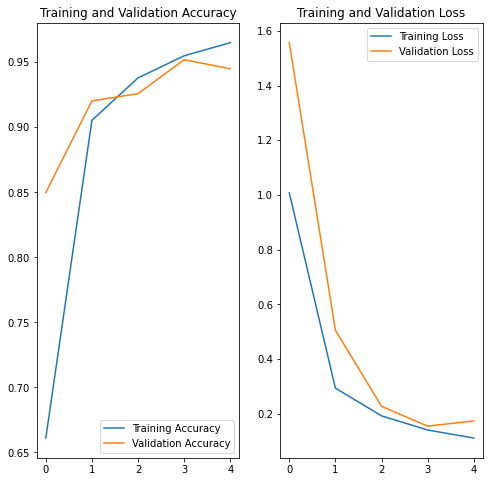

In [23]:
import matplotlib.pyplot as plt

acc = history_wav.history['accuracy']
val_acc = history_wav.history['val_accuracy']

loss=history_wav.history['loss']
val_loss=history_wav.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 모델 평가

In [24]:
model_wav.load_weights(checkpoint_dir)

In [25]:
results = model_wav.evaluate(test_dataset)

20/20 [==============================] - 18s 886ms/step - loss: 0.1549 - accuracy: 0.9518


In [26]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

loss value: 0.155
accuracy value: 95.1798%


# 예측값 확인

In [29]:

import random
inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_wav), size=1, replace=False)

batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav(batch_xs, training=False)

print("label : ", str(inv_label_value[batch_ys[0]]))

# ipd.Audio(batch_xs.reshape(8000,), rate=8000)

label :  down


In [30]:
if np.argmax(y_pred_) == batch_ys[0]:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Correct!)')
else:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Incorrect!)')

y_pred: down(Correct!)


# skip-connection 모델 구성

In [11]:
from tensorflow.keras import layers
input_tensor = layers.Input(shape=(130, 126, 1))

x = layers.Conv2D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv2D(32, 9, padding='same', activation='relu')(x)
skip_1 = layers.MaxPool2D()(x)

x = layers.Conv2D(64, 9, padding='same', activation='relu')(skip_1)
x = layers.Conv2D(64, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_1], -1)
skip_2 = layers.MaxPool2D()(x)

x = layers.Conv2D(128, 9, padding='same', activation='relu')(skip_2)
x = layers.Conv2D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv2D(128, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_2], -1)
skip_3 = layers.MaxPool2D()(x)

x = layers.Conv2D(256, 9, padding='same', activation='relu')(skip_3)
x = layers.Conv2D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv2D(256, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_3], -1)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)

model_wav_skip = tf.keras.Model(input_tensor, output_tensor)

model_wav_skip.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 130, 126, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 130, 126, 32) 2624        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 130, 126, 32) 82976       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 65, 63, 32)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [12]:
optimizer=tf.keras.optimizers.Adam(1e-4)
model_wav_skip.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer=optimizer,
             metrics=['accuracy'])

In [13]:
# the save point
checkpoint_dir = os.getenv('HOME')+'/aiffel/speech_recognition/models/wav_skip'

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)

# 모델 훈련

In [14]:
#30분 내외 소요
history_wav_skip = model_wav_skip.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_wav) // batch_size,
                    validation_data=test_dataset,
                    validation_steps=len(test_wav) // batch_size,
                    callbacks=[cp_callback]
                    )

Epoch 1/5
177/177 [==============================] - ETA: 0s - loss: 1.0791 - accuracy: 0.6494
Epoch 00001: val_loss improved from inf to 0.65730, saving model to /home/aiffel/aiffel/speech_recognition/models/wav_skip
177/177 [==============================] - 204s 1s/step - loss: 1.0791 - accuracy: 0.6494 - val_loss: 0.6573 - val_accuracy: 0.8273
Epoch 2/5
177/177 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.9080
Epoch 00002: val_loss improved from 0.65730 to 0.25016, saving model to /home/aiffel/aiffel/speech_recognition/models/wav_skip
177/177 [==============================] - 201s 1s/step - loss: 0.2867 - accuracy: 0.9080 - val_loss: 0.2502 - val_accuracy: 0.9245
Epoch 3/5
177/177 [==============================] - ETA: 0s - loss: 0.1773 - accuracy: 0.9437
Epoch 00003: val_loss improved from 0.25016 to 0.22170, saving model to /home/aiffel/aiffel/speech_recognition/models/wav_skip
177/177 [==============================] - 202s 1s/step - loss: 0.1773 - a

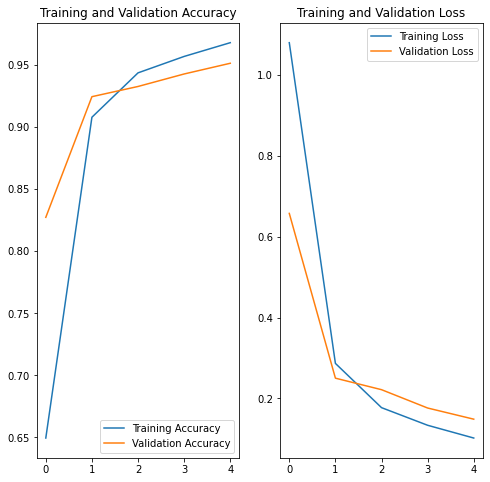

✅


In [15]:
import matplotlib.pyplot as plt

acc = history_wav_skip.history['accuracy']
val_acc = history_wav_skip.history['val_accuracy']

loss=history_wav_skip.history['loss']
val_loss=history_wav_skip.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("✅")

# 모델 평가

In [21]:
# Evaluation 

model_wav_skip.load_weights(checkpoint_dir)
results = model_wav_skip.evaluate(test_dataset)

# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

ResourceExhaustedError:  OOM when allocating tensor with shape[256,32,130,126] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/conv2d/Conv2D (defined at <ipython-input-14-c4cf9b41bcc5>:6) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_test_function_2567]

Function call stack:
test_function


# 예측값 확인

In [18]:
# Test 

inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_wav), size=1, replace=False)

batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav_skip(batch_xs, training=False)

print("label : ", str(inv_label_value[batch_ys[0]]))



label :  left


In [19]:
if np.argmax(y_pred_) == batch_ys[0]:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Correct!)')
else:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Incorrect!)')

y_pred: left(Correct!)


# 프로젝트 진행 중 의문점   
   
   
## **1. 데이터 변형에서**   
def wav2spec(wav, fft_size=258) wav2spec 함수의 인자에서 fft_size=258 이 하는 역할은 무엇인가?   
**찾아보니 다양한 값을 줄 수 있는 것 같은데 어떤 차이가 있는지 확인해 볼 것!**   
   
   
## **2. 훈련 / 테스트셋 분리 및 모델 구성에서**   
   
### **1. 처음에는**   

#sr = 16380    
train_wav, test_wav, train_label, test_label = train_test_split(spec_data,label_data,test_size=0.1, shuffle=True)   

   
   
train_wav = train_wav.reshape([-1, sr, 1])   
test_wav = test_wav.reshape([-1, sr, 1])   
   
위와 같이 코드를 입력했다. Conv1d 모델은 1차원 데이터를 학습하는 것이라고 막연히 알고 있어   
2차원의 spec data를 다시 1차원으로 만들어 입력을 해야 된다는 생각이 들었기 때문이다.   
spec data의 shape은 130, 126 이므로 단순히 행과 열을 곱해서 16380으로 만들고   
각각 train_wav, test_wav 에 reshape할 때 반영했다.   
   
**위와 같이 했을 때는 모델을 생성할 때**   
      
input_tensor = layers.Input(shape=(sr, 1))   
입력값을 다음과 같이 주었고, 모델 훈련 및 평가가 문제 없이 진행되었다.   
**그런데 이렇게 해도 되는 건지 잘 모르겠다. 확인 필요**   
   
### **2. 두번째에서는**   
   
2차원 spec data를 그대로 입력값으로 주기 위해 아래와 같이 reshape을 해주었고   
   
   
train_wav = train_wav.reshape([-1, 130, 126 , 1])   
test_wav = test_wav.reshape([-1, 130, 126, 1])   
   
**모델 생성시 입력값을 아래와 같이 주어야 했다.**   
   
input_tensor = layers.Input(shape=(130, 126, 1 ))   
   
**또한 Conv1d, maxpooling1d 모두 숫자 2로 바꿔줘야 했다**   

   
### 그냥 이렇게 숫자만 바꿔줘도 된다는 데 충격먹었다
   
### 이미지 분류기에 쓴 2D 모델과 차이가 궁금하다. 확인해볼 것
   
## **3. skip-connection모델에서**   
이전 모델보다 오히려 성능이 좋지 않았다   
2~3% 하락.   
원인이 무엇일까? 이것도 나중에 확인해 볼 것.   




## 프로젝트 진행 중 새로 알아낸 것   
#### 1. spec 데이터를 다시 wav로 바꾸기   
spec 데이터로 학습을 진행한 후 평가를 할 때 모델이 예측한 음원값의 녹음 소리를 직접 들어보고 싶었다   
다시 원래대로 돌리기 위해선 librosa 라이브러리의 griffinlim() 함수를 써야 한다는 것을 찾아냈는데 구현하진 못했다.   
복구시 원상복구는 안 된다고 한다.   
   
spec data를 그대로 들어볼 수 있는 프로그램이 없는지도 찾아봐야겠다   



# 회고   
오디오에 평소에 관심이 많아 음향기기를 수집하면서 개인적으로 관심이 많이 갔던 노드였다.   
음성인식 보다는 음질이나 음향에 관해 더 공부해보고 싶고   
그쪽 분야에 딥러닝이 어떻게 쓰이는 지도 찾아봐야겠다.   
